In [21]:
# data exploration... much if this is borrowed from these analyses at kaggle:
# 1. https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services
# 2. https://www.kaggle.com/netzone/eda-and-fraud-detection

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

In [22]:
data_location = "C:\\dev\\aws\\fraud\\data\\PS_20174392719_1491204439457_log.csv"

#import boto3
#import pandas as pd
#from sagemaker import get_execution_role
#
#role = get_execution_role()
#bucket='aws-ml-anomalydetection'
#data_key = 'PS_20174392719_1491204439457_log.csv'
#data_location = 's3://{}/{}'.format(bucket, data_key)
#
data = pd.read_csv(data_location)
print (data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [23]:
data.shape

(6362620, 11)

In [24]:
# any nulls anywhere...?
data.isnull().values.any()

False

In [25]:
# are there any "type" values that are never marked fraud...?
list(data.loc[data.isFraud == 1].type.drop_duplicates().values)

['TRANSFER', 'CASH_OUT']

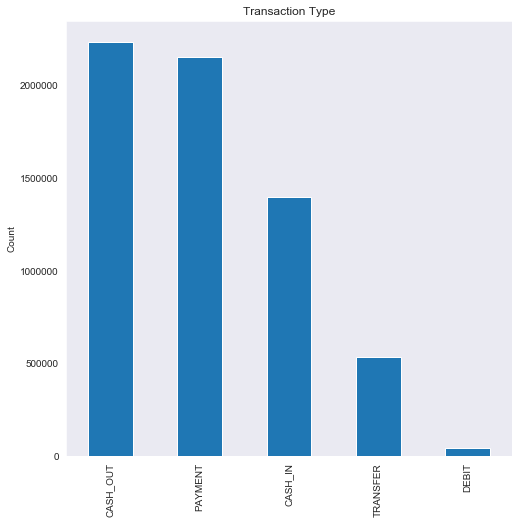

In [40]:
# simple counts of transaction type...
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction Type", ax=ax, figsize=(8,8), colormap='tab10')
ax.set_ylabel("Count")
plt.show()

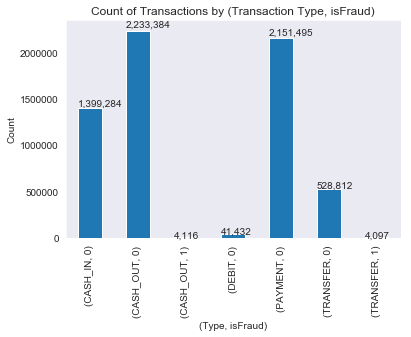

In [42]:
# chart of isFraud values by type...
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar', colormap='tab10')
ax.set_title("Count of Transactions by (Transaction Type, isFraud)")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.02))

In [54]:
min(data.step)

1

In [55]:
max(data.step)

743

Text(0,0.5,'Count')

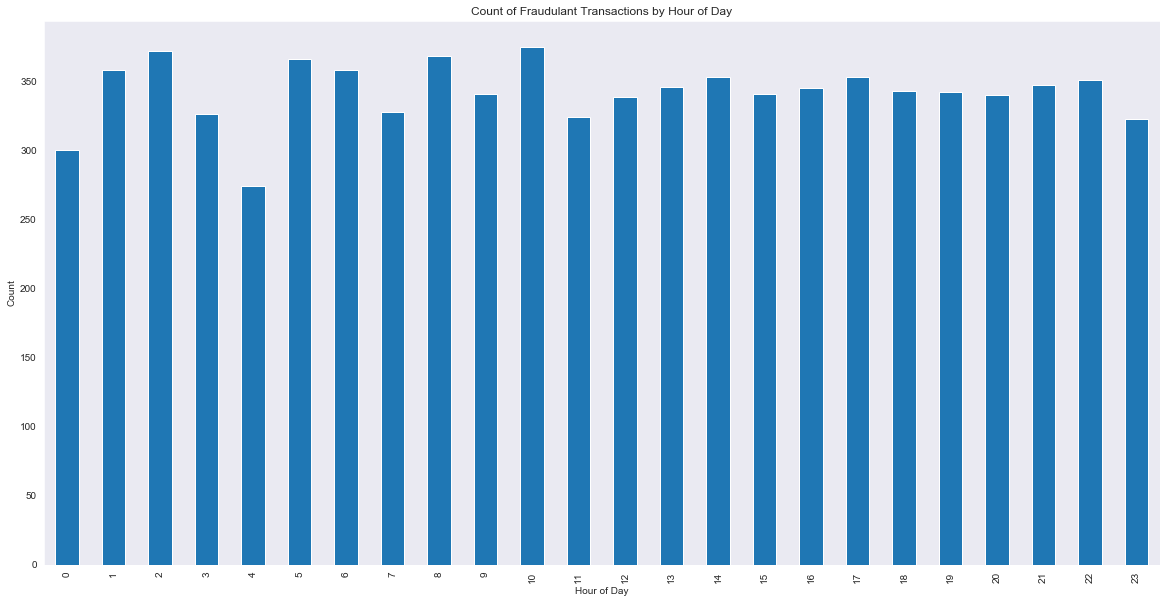

In [63]:
# counts of isFraud by hour of day (1 through 24)
data["hourOfDay"] = data.step % 24
ax = data[data.isFraud==1].groupby(['hourOfDay']).size().plot(kind='bar', colormap='tab10', figsize=(20,10))
ax.set_title("Count of Fraudulant Transactions by Hour of Day")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")

Text(0,0.5,'Count')

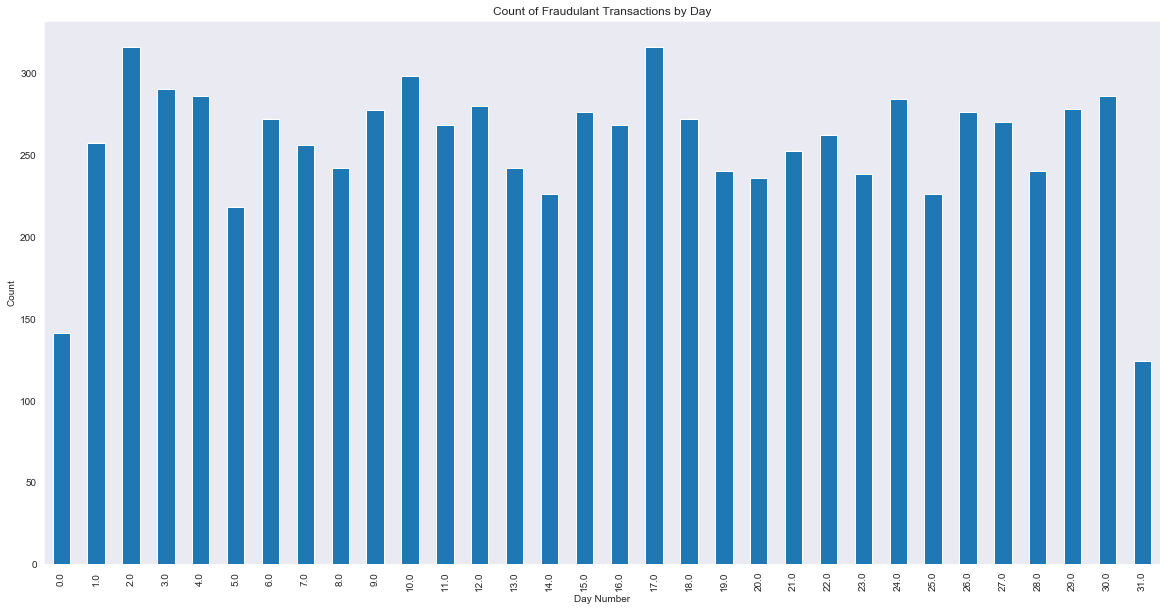

In [64]:
# counts by "day"... we don't know what day it is (e.g. day of week... can we infer anything? ... doiesn't look like it)
data["DayNumber"] = round(data.step / 24)
ax = data[data.isFraud==1].groupby(['DayNumber']).size().plot(kind='bar', colormap='tab10', figsize=(20,10))
ax.set_title("Count of Fraudulant Transactions by Day")
ax.set_xlabel("Day Number")
ax.set_ylabel("Count")